In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='whitegrid')

In [109]:
df = pd.read_csv('mnist_test.csv')

In [110]:
df.shape

(10000, 785)

In [65]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df['label'].unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8], dtype=int64)

In [70]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [74]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 784)
(2000, 784)
(8000,)
(2000,)


In [119]:
print(y_train.isna().sum())
print(y_test.isna().sum())

0
0


- Measuring the accuracy of our model with 784 features which is around "94%"

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)

from sklearn.metrics import accuracy_score

n_score = accuracy_score(y_test,y_pred)
n_score

0.945

- Lets apply PCA for feature extraction

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

x_train_trf = pca.fit_transform(x_train)

In [77]:
n = np.cumsum(pca.explained_variance_ratio_)
n = n*100

In [78]:
n[-1]

100.0

- The graph below shows the 

Text(0.5, 1.0, 'Graph between variance explained for number of features')

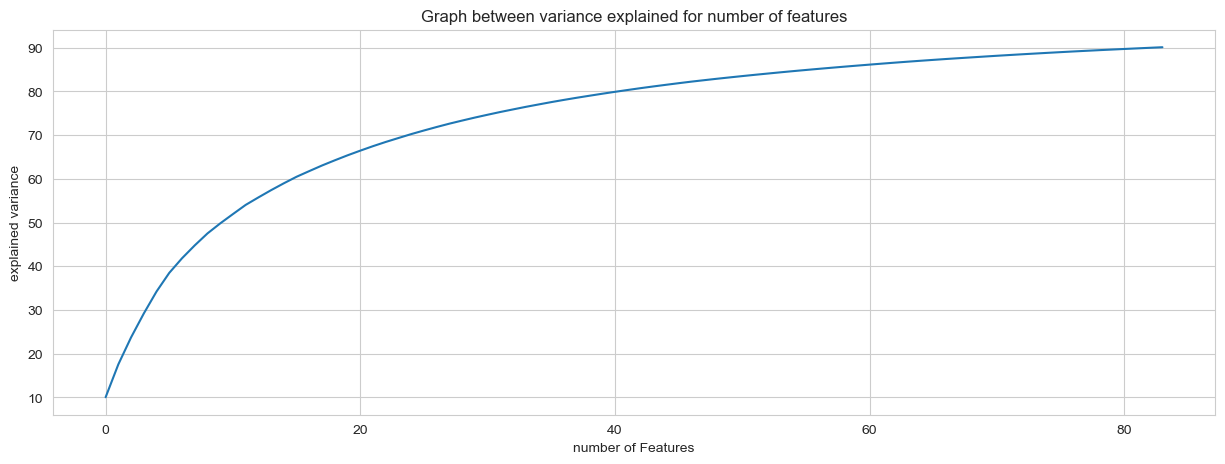

In [86]:
plt.figure(figsize=(15,5))
sns.lineplot(n)
plt.xlabel("number of Features")
plt.ylabel("explained variance")
plt.title("Graph between variance explained for number of features")


- Extracting the minimum number of features required to explain 90% variance of our data

In [80]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    n = np.cumsum(pca.explained_variance_ratio_)
    n = n*100
    if n[-1] >= 90:
        break
print(i,n[-1])

84 90.08998152241311


- with 84 Principle Components we can explain 90% varianve of the given data

In [81]:
pca = PCA(n_components=84)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)


x_train_trf

knc_1 = KNeighborsClassifier()

knc_1.fit(x_train_trf,y_train)
y_pred_trf = knc_1.predict(x_test_trf)

trf_score = accuracy_score(y_test,y_pred_trf)
trf_score

0.9535

- with 84 features we get the accuracy score of 95%

## General experiment

In [87]:
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)

In [131]:
ndf = pd.DataFrame()
ndf['pc1'] = x_train_2d[:,0]
ndf['pc2'] = x_train_2d[:,1]
ndf['target'] = y_train.reset_index(drop=True)

ndf['target'] = ndf['target'].astype(int)

In [132]:
ndf.head()

,pc1,pc2,target
0,-609.016237,172.830055,8
1,-174.876973,279.775992,2
2,775.161994,-65.964592,6
3,515.020708,-42.281323,5
4,-931.493550,683.599835,1


<Axes: title={'center': "Scatter plot of 784 features data in 2D with the help of 'PCA'"}, xlabel='pc1', ylabel='pc2'>

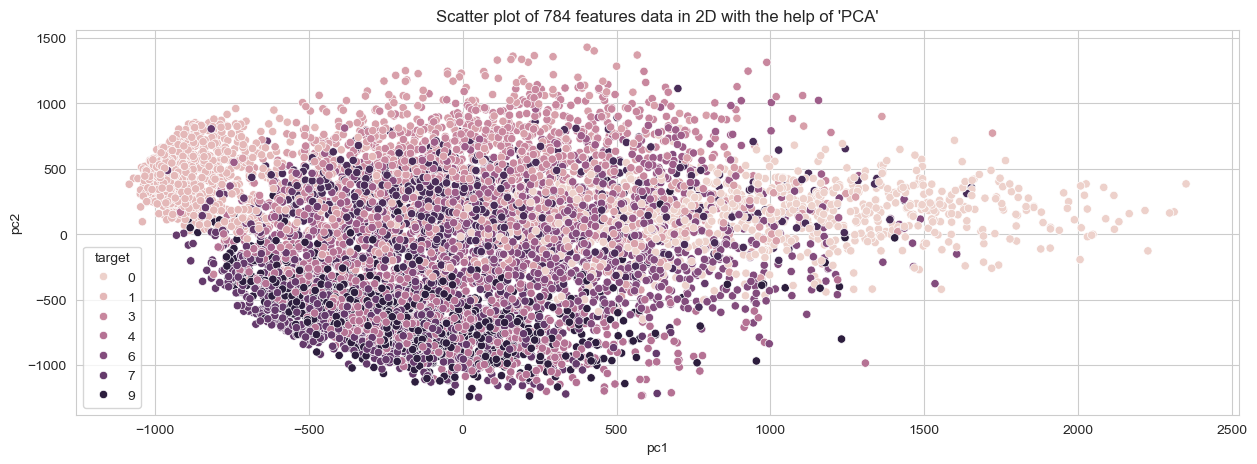

In [134]:
plt.figure(figsize=(15,5))
plt.title("Scatter plot of 784 features data in 2D with the help of 'PCA'")
sns.scatterplot(data=ndf,x = 'pc1',y = 'pc2',hue='target')